<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Graphics-and-Devises" data-toc-modified-id="Graphics-and-Devises-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Graphics and Devises</a></span></li><li><span><a href="#R-graphics-parameters,-layouts-&amp;-margins," data-toc-modified-id="R-graphics-parameters,-layouts-&amp;-margins,-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>R graphics parameters, layouts &amp; margins,</a></span></li><li><span><a href="#Multifigure-Layouts" data-toc-modified-id="Multifigure-Layouts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multifigure Layouts</a></span></li></ul></div>

## Graphics and Devises

In [4]:
?dev.off

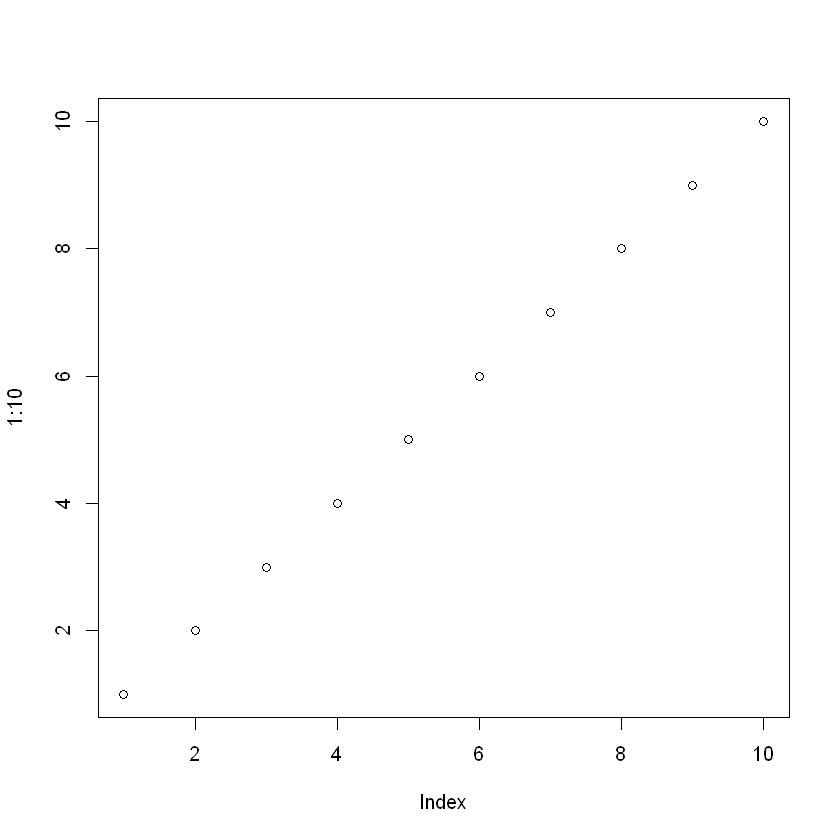

windows 
      6

png 
  2

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


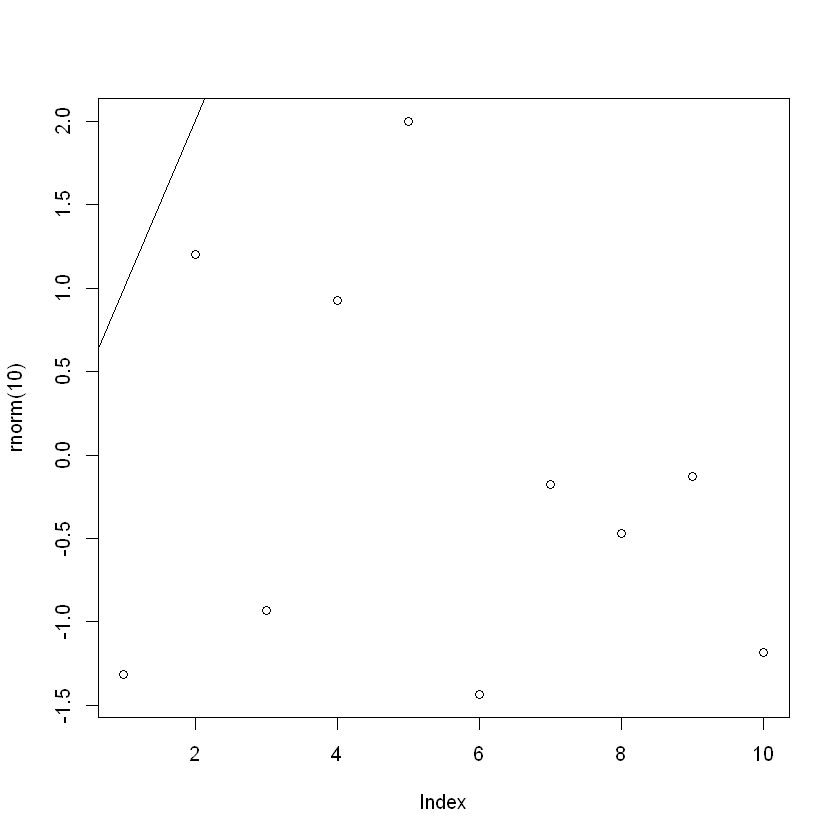

In [5]:
## Not run: ## Unix-specific example
x11()
plot(1:10)
x11()
plot(rnorm(10))
dev.set(dev.prev())
abline(0, 1) # through the 1:10 points
dev.set(dev.next())
abline(h = 0, col = "gray") # for the residual plot
dev.set(dev.prev())
dev.off(); dev.off() #- close the two X devices

## End(Not run)

## R graphics parameters, layouts & margins,

Graphs are typically created using a series of **high-level** and **low-level**
plotting commands. High-level functions **create new plots** and low-level
functions **add information to an existing plot**.

**par():** Customize graphs (line style, symbols, color, etc) by specifying graphical
parameters

The `par` function can be used to control margins and the layout of plots on the page, using the parameters `mar, mai,
pin, oma, omi, mfrow` and `mfcol`.
* There are 72 graphics which par parameters holds.
* You can view the settings of the parameters by typing 
`par()`  
* View their names by typing 
`names(par())` 
* To extract a graphic parameter, `par("tag ") or par()$tag` .`  
* To set a graphic parameter, `par(tag=value )`.

**List of Graphical Parameters:** 

 

| V1       | V2       | V3        | V4      | V5   | V6     |
|----------|----------|-----------|---------|------|--------|
| xlog     | cin      | family    | lheight | mkh  | srt    |
| ylog     | col      | fg        | ljoin   | new  | tck    |
| adj      | col.axis | fig       | lmitre  | oma  | tcl    |
| ann      | col.lab  | fin       | lty     | omd  | usr    |
| ask      | col.main | font      | lwd     | omi  | xaxp   |
| bg       | col.sub  | font.axis | mai     | page | xaxs   |
| bty      | cra      | font.lab  | mar     | pch  | xaxt   |
| cex      | crt      | font.main | mex     | pin  | xpd    |
| cex.axis | csi      | font.sub  | mfcol   | plt  | yaxp   |
| cex.lab  | cxy      | lab       | mfg     | ps   | yaxs   |
| cex.main | din      | las       | mfrow   | pty  | yaxt   |
| cex.sub  | err      | lend      | mgp     | smo  | ylbias |

| High-level                     | Description                                                                             | Low-level | Other                  |
|--------------------------------|-----------------------------------------------------------------------------------------|-----------|------------------------|
| `plot()`                       | Scatterplot-------------------------------------Add points to a figure                                                                          | `points`  | `par`                  |
| `hist()`                       | Histogram-------------------------------------Add lines to a figure                                                                             | `lines`   | `colors`               |
| `boxplot()`                    | Boxplot-------------------------------------Insert text in the plot region                                                                                 | `text`    | `palette`              |
| `qqplot(), qqnorm(), qqline()` | Quantile plots-------------------------------------Insert text in the figure and outer margins                                                                      | `mtext`   | `colorRamp`            |
| `interaction.plot()`           | Interaction plot-------------------------------------Add figure title or outer title                                                                       | `title`   | `rainbow, heat.colors` |
| `sunflowerplot()`              | Sunflower scattterplot-------------------------------------Insert legend                                                                  | `legend`  | `grey`                 |
| `pairs()`                      | Scatter plot matrix-------------------------------------Customize axes                                                                     | `axis`    | `col2rgb, rgb2hsv`     |
| `symbols()`                    | Draw Symbols on plots-------------------------------------Add horizontal and vertical lines or a single line                                                                  | `abline`  | `rgb, hsv, hcl`        |
| `dotchart(), barplot(), pie()` | Dot chart, bar plot, pie chart-------------------------------------Draw a box around the current plot                                                         | `box`     | `layout, layout.show`  |
| `curve()`                      | Draw a curve from a given function-------------------------------------Add a 1-D plot of the data to the gure                                                      | `rug`     | `windows`              |
| `image()`                      | Create a grid of colored rectangles with colors based on the values of a third variable | `lowess`  | `pdf`                  |
| `contour(), filled.contour()`  | Contour plot-------------------------------------Draw a polygon                                                                            | `polygon` | `dev.off, dev.new`     |
| persp()                        | Plot 3-D surface-------------------------------------Draw a rectangle                                                                    | `rect`    | `jitter`               |

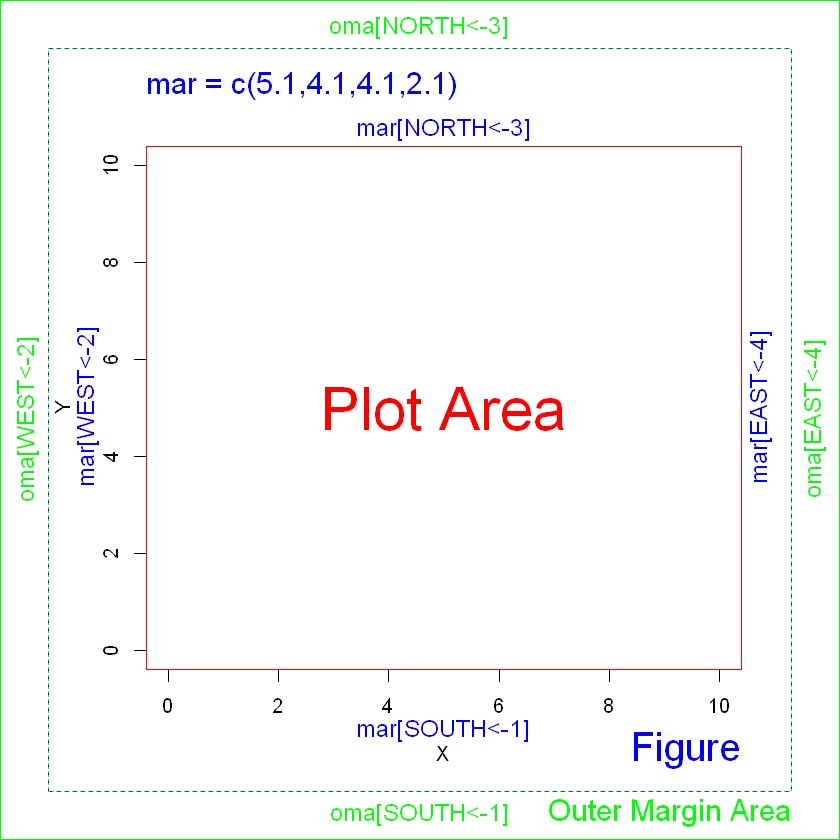

In [6]:

GenericFigure <- function(ID, size1, size2)
{
  plot(0:10, 0:10, type="n", xlab="X", ylab="Y")
  text(5,5, ID, col="red", cex=size1)
  box("plot", col="red")
  mtext("Figure", SOUTH<-1, line=3, adj=1.0, cex=size2, col="blue")
}

# Figure 1. Default R Plot Area / Figure Area
Figure1 <- function()
{
  oldpar <- par(oma=c(0,0,0,0)) # default values
  GenericFigure("Plot Area", 3,2)
  box("figure", col="blue")
  par(oldpar)
}


par(oma=c(2,2,2,2))

GenericFigure("Plot Area", 3,2)

# "figure" box and "inner" margin box same for single figure plot
box("figure",lty="dashed", col="blue")
box("inner", lty="dotted", col="green")

mtext("Outer Margin Area", SOUTH<-1, line=0.4, adj=1.0, cex=1.5,
      col="green", outer=TRUE)
box("outer", lty="solid", col="green")

Margins <- capture.output( par()$mar )
Margins <- substr(Margins, 5, nchar(Margins))
Margins <-
  paste("mar = c(", gsub(" ",",",Margins), ")", sep="")
mtext(Margins, NORTH<-3, line=2, adj=0.0, cex=1.5, col="blue")

#Figure2A()

# Text: one string per mtext call
mtext("mar[SOUTH<-1]", SOUTH<-1, at=5, line=2,    cex=1.2, col="blue")
mtext("mar[WEST<-2]",  WEST <-2, at=5, line=2,    cex=1.2, col="blue")
mtext("mar[NORTH<-3]", NORTH<-3, at=5, line=0.25, cex=1.2, col="blue")
mtext("mar[EAST<-4]",  EAST <-4, at=5, line=0.25, cex=1.2, col="blue")

# Text: vector of strings in mtext call
mtext(c("oma[SOUTH<-1]", "oma[WEST<-2]", "oma[NORTH<-3]", "oma[EAST<-4]"),
      c(SOUTH<-1, WEST<-2, NORTH<-3, EAST<-4),
      line=0.4, cex=1.2, col="green", outer=TRUE)

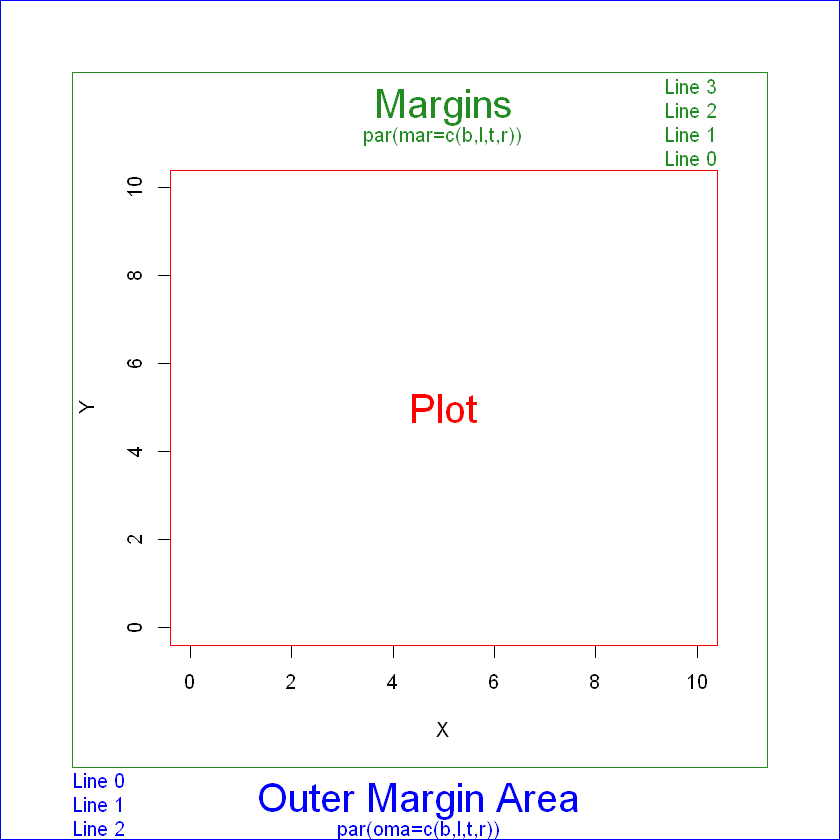

In [7]:
# Margins area
par(oma=c(3,3,3,3))  # all sides have 3 lines of space  
par(mar=c(5,4,4,2) + 0.1)   

# Plot  
plot(0:10, 0:10, type="n", xlab="X", ylab="Y")    # type="n" hides the points  

# Place text in the plot and color everything plot-related red  
text(5,5, "Plot", col="red", cex=2)  
box("plot", col="red")  

# Place text in the margins and label the margins, all in forestgreen  
mtext("Margins", side=3, line=2, cex=2, col="forestgreen")  
mtext("par(mar=c(b,l,t,r))", side=3, line=1, cex=1, col="forestgreen")  
mtext("Line 0", side=3, line=0, adj=1.0, cex=1, col="forestgreen")  
mtext("Line 1", side=3, line=1, adj=1.0, cex=1, col="forestgreen")  
mtext("Line 2", side=3, line=2, adj=1.0, cex=1, col="forestgreen")  
mtext("Line 3", side=3, line=3, adj=1.0, cex=1, col="forestgreen")  
box("figure", col="forestgreen")  

# Label the outer margin area and color it blue  
# Note the 'outer=TRUE' command moves us from the figure margins to the outer margins.  
mtext("Outer Margin Area", side=1, line=1, cex=2, col="blue", outer=TRUE)  
mtext("par(oma=c(b,l,t,r))", side=1, line=2, cex=1, col="blue", outer=TRUE)  
mtext("Line 0", side=1, line=0, adj=0.0, cex=1, col="blue", outer=TRUE)  
mtext("Line 1", side=1, line=1, adj=0.0, cex=1, col="blue", outer=TRUE)  
mtext("Line 2", side=1, line=2, adj=0.0, cex=1, col="blue", outer=TRUE)  
box("outer", col="blue")  

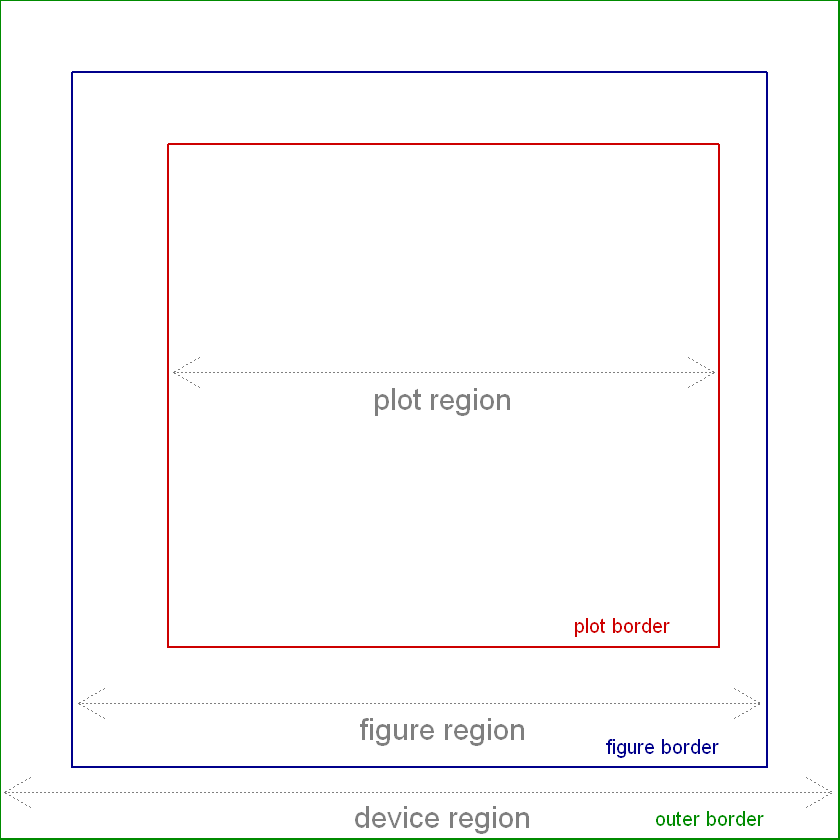

In [8]:
# ----- plot region / figure region / device region -------------------------------------

old_par <- par(no.readonly = TRUE)

par(mar=c(5, 4, 3, 2))		# margins (between plot border and figure border)
par(oma=c(3, 3, 3, 3))		# outer margins (between outer border and figure border)
par(xpd=NA)					# show text and arrows outside plot region

par(xaxt = "n", yaxt = "n")	# do not draw axes

plot(0:10, 0:10, type="n", xlab=NA, ylab=NA)

box("plot", col="red3", lwd=2)
text(8.5, 0.05, "plot border", col="red3")

box("figure", col="blue4", lwd=2)
mtext("figure border", col="blue4", side=1, adj=1, line=3.6)

box("outer", col="green4", lwd=2)
mtext("outer border", col="green4", side=1, adj=1.1, line=6.6)

text(5, 4.9, "plot region", col="gray50", cex=1.5) 
arrows(-0.3, 5.5, 10.3, 5.5, code=3, col="gray50", lwd=1.5, lty=3)

mtext("figure region", side=1, adj=0.5, line=3, col="gray50", cex=1.5)
arrows(-2.15, -1.6, 11.2, -1.6, code=3, col="gray50", lwd=1.5, lty=3)

mtext("device region", side=1, adj=0.5, line=6.7, col="gray50", cex=1.5)
arrows(-3.6, -3.5, 12.6, -3.5, code=3, col="gray50", lwd=1.5, lty=3)

par(old_par)


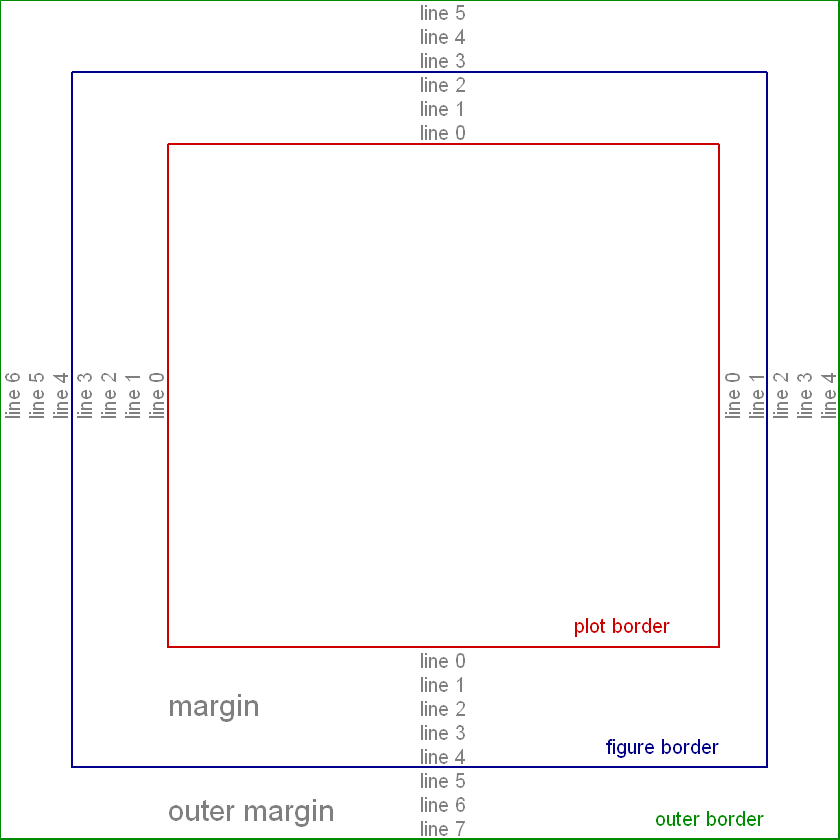

In [9]:
# ----- margins overview ----------------------------------------------------------------

old_par <- par(no.readonly = TRUE)

par(mar=c(5, 4, 3, 2))		# margins (between plot border and figure border)
par(oma=c(3, 3, 3, 3))		# outer margins (between outer border and figure border)
par(xpd=NA)					# show text and arrows outside plot region

par(xaxt = "n", yaxt = "n")	# do not draw axes

plot(0:10, 0:10, type="n", xlab=NA, ylab=NA)

box("plot", col="red3", lwd=2)
text(8.5, 0.05, "plot border", col="red3")

box("figure", col="blue4", lwd=2)
mtext("figure border", col="blue4", side=1, adj=1, line=3.6)

box("outer", col="green4", lwd=2)
mtext("outer border", col="green4", side=1, adj=1.1, line=6.6)

for (s in 1:4) {			# placement of text in margins
	for (i in 0:8) {
		mtext(paste("line", i), col="gray50", side=s, adj=0.5, line=i)
	}
}

mtext("margin", side=1, adj=0, line=2, col="gray50", cex=1.5)
mtext("outer margin", side=1, adj=0, line=6.4, col="gray50", cex=1.5)

par(old_par)

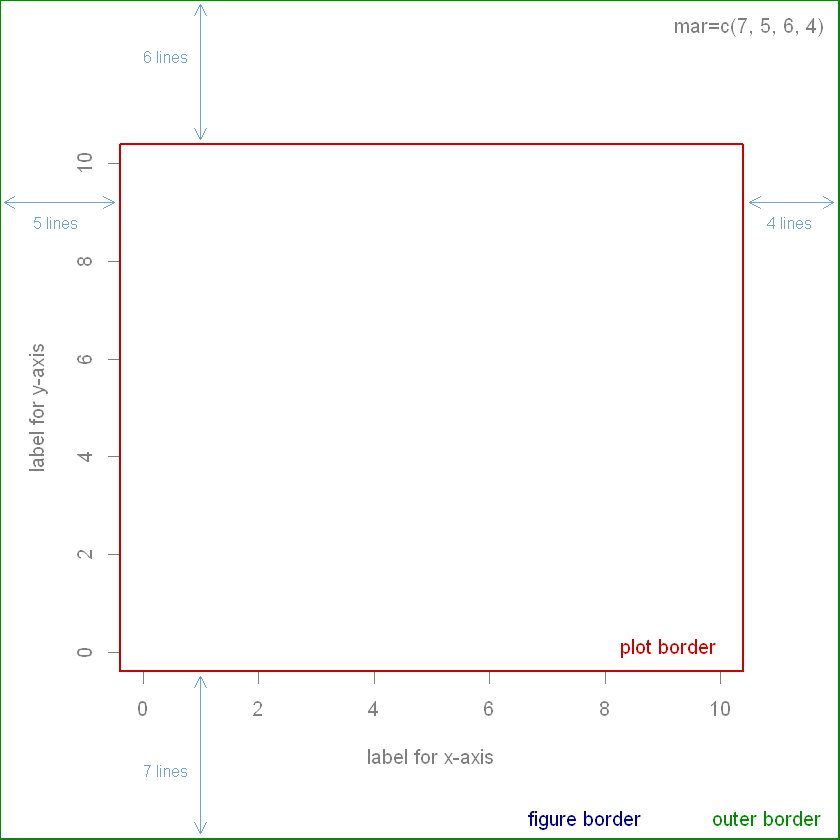

In [10]:
# ----- setting margins --------------------------------------------------------------

old_par <- par(no.readonly = TRUE)

par(mar=c(7, 5, 6, 4))			# margins (between plot and figure borders)
par(xpd=NA)						# show text and arrows outside plot region								# set axis values, axis labels, and axis to gray
par(col.axis="gray50", col.lab="gray50", fg="gray50") 

plot(0:10, 0:10, type="n", xlab="label for x-axis", ylab="label for y-axis")

box("plot", col="red3", lwd=2)
text(9.1, 0.1, "plot border", col="red3")

box("figure", col="blue4", lwd=2)
mtext("figure border", col="blue4", side=1, adj=0.8, line=5.6)

box("outer", col="green4", lwd=2)
mtext("outer border", col="green4", side=1, adj=1.15, line=5.6)

									# arrow annotations for margins
text(0.4, -2.4, "7 lines", col="skyblue3", cex=0.8)
arrows(1, -3.7, 1, -0.5, code=3, col="skyblue3", length=0.1)
text(0.4, 12.2, "6 lines", col="skyblue3", cex=0.8)
arrows(1, 10.5, 1, 13.25, code=3, col="skyblue3", length=0.1)
text(-1.5, 8.8, "5 lines", col="skyblue3", cex=0.8)
arrows(-0.5, 9.2, -2.4, 9.2, code=3, col="skyblue3", length=0.1)
text(11.2, 8.8, "4 lines", col="skyblue3", cex=0.8)
arrows(10.5, 9.2, 11.95, 9.2, code=3, col="skyblue3", length=0.1)
text(10.5, 12.8, "mar=c(7, 5, 6, 4)")

par(old_par)


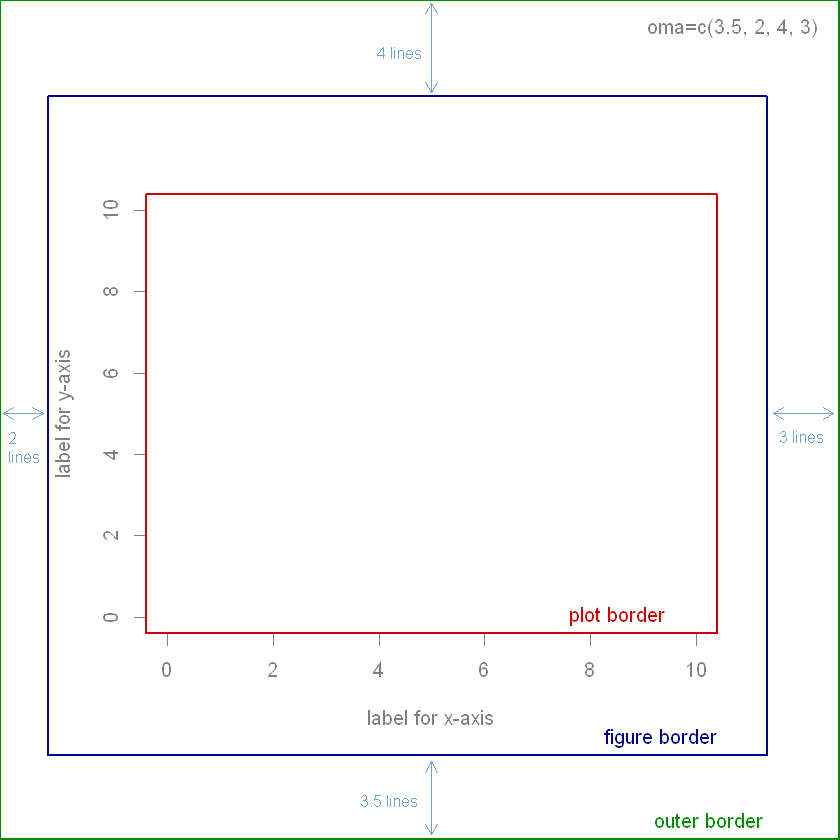

In [11]:
# ----- setting outer margins ---------------------------------------------------------


old_par <- par(no.readonly = TRUE)

par(oma=c(3.5, 2, 4, 3))			# setting outer margins (in units of lines)
									# default values for margins are c(5.1, 4.1, 4.1, 2.1)
par(xpd=NA)							# show text and arrows outside plot region									# set axis values, axis labels, and axis to gray
par(col.axis="gray50", col.lab="gray50", fg="gray50") 
												
plot(0:10, 0:10, type="n", xlab="label for x-axis", ylab="label for y-axis")

box("plot", col="red3", lwd=2)
text(8.5, 0.05, "plot border", col="red3")

box("figure", col="blue4", lwd=2)
mtext("figure border", col="blue4", side=1, adj=1, line=3.8)

box("outer", col="green4", lwd=2)
mtext("outer border", col="green4", side=1, adj=1.1, line=7.3)

									# arrow annotations for outer margins
text(4.2, -4.5, "3.5 lines", col="skyblue3", cex=0.8)
arrows(5, -5.35, 5, -3.55, code=3, col="skyblue3", length=0.1)
text(-3, 4.2, "2\nlines", adj=0, col="skyblue3", cex=0.8)
arrows(-3.1, 5, -2.35, 5, code=3, col="skyblue3", length=0.1)
text(4.4, 13.9, "4 lines", col="skyblue3", cex=0.8)
arrows(5, 15.1, 5, 12.9, code=3, col="skyblue3", length=0.1)
text(12, 4.45, "3 lines", col="skyblue3", cex=0.8)
arrows(11.45, 5, 12.6, 5, code=3, col="skyblue3", length=0.1)
text(10.7, 14.5, "oma=c(3.5, 2, 4, 3)")

par(old_par)


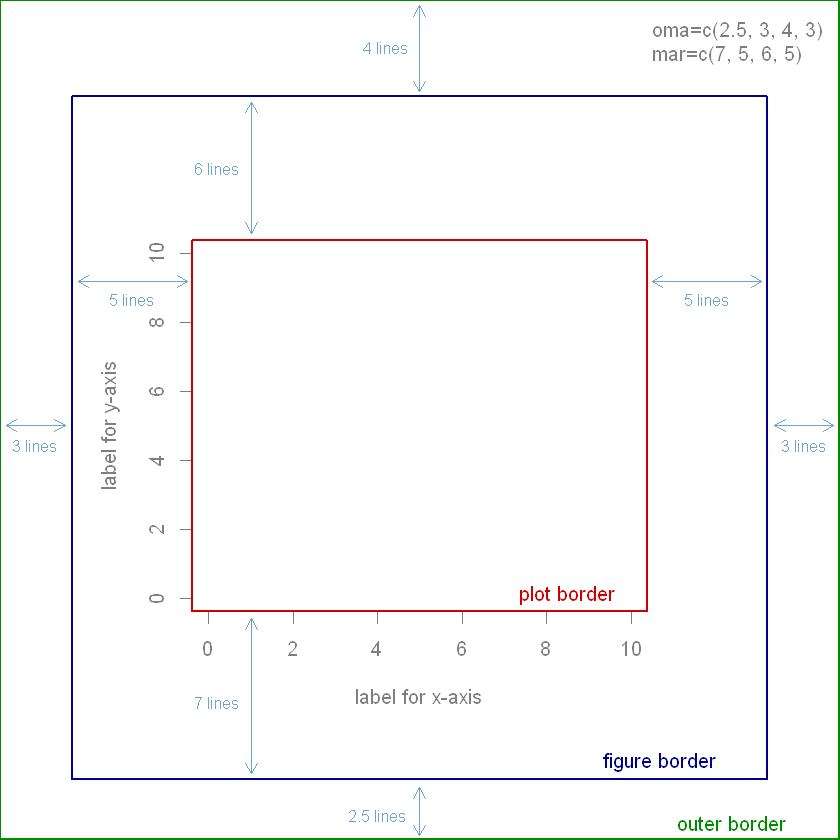

In [12]:
# ----- setting both margins and outer margins -----------------------------------------

old_par <- par(no.readonly = TRUE)

par(oma=c(2.5, 3, 4, 3))			# outer margins
par(mar=c(7, 5, 6, 5))				# margins (between plot and figure borders)
par(xpd=NA)							# show text and arrows outside plot region
									# set axis values, axis labels, and axis to gray
par(col.axis="gray50", col.lab="gray50", fg="gray50") 

plot(0:10, 0:10, type="n", xlab="label for x-axis", ylab="label for y-axis")

box("plot", col="red3", lwd=2)
text(8.5, 0.1, "plot border", col="red3")

box("figure", col="blue4", lwd=2)
mtext("figure border", col="blue4", side=1, adj=1.2, line=5.7)

box("outer", col="green4", lwd=2)
mtext("outer border", col="green4", side=1, adj=1.4, line=8.3)

									# arrow annotations for outer margins
text(4, -6.3, "2.5 lines", col="skyblue3", cex=0.8)
arrows(5, -6.9, 5, -5.5, code=3, col="skyblue3", length=0.1)
text(4.2, 16, "4 lines", col="skyblue3", cex=0.8)
arrows(5, 14.7, 5, 17.2, code=3, col="skyblue3", length=0.1)
text(-4.1, 4.45, "3 lines", col="skyblue3", cex=0.8)
arrows(-4.8, 5, -3.4, 5, code=3, col="skyblue3", length=0.1)
text(14.1, 4.45, "3 lines", col="skyblue3", cex=0.8)
arrows(13.4, 5, 14.8, 5, code=3, col="skyblue3", length=0.1)

									# arrow annotations for margins
text(0.2, -3, "7 lines", col="skyblue3", cex=0.8)
arrows(1, -5.1, 1, -0.6, code=3, col="skyblue3", length=0.1)
text(0.2, 12.5, "6 lines", col="skyblue3", cex=0.8)
arrows(1, 10.6, 1, 14.4, code=3, col="skyblue3", length=0.1)
text(-1.8, 8.7, "5 lines", col="skyblue3", cex=0.8)
arrows(-0.5, 9.2, -3.1, 9.2, code=3, col="skyblue3", length=0.1)
text(11.8, 8.7, "5 lines", col="skyblue3", cex=0.8)
arrows(10.5, 9.2, 13.1, 9.2, code=3, col="skyblue3", length=0.1)

text(10.5, 16.2, "oma=c(2.5, 3, 4, 3)\nmar=c(7, 5, 6, 5)", adj=0)

par(old_par)


<span style="color:red; font-family:centurygothic ">Continue...</span><a href="http://www.melissaclarkson.com/resources/R_guides/documents/figure_layout_Ver1.R" target="_blank">http://www.melissaclarkson.com/resources/R_guides/documents/figure_layout_Ver1.R</a>  
<a href="http://www.melissaclarkson.com/resources/R_guides/documents/figure_layout_Ver1.pdf" target="_blank">http://www.melissaclarkson.com/resources/R_guides/documents/figure_layout_Ver1.pdf</a>  

## Multifigure Layouts

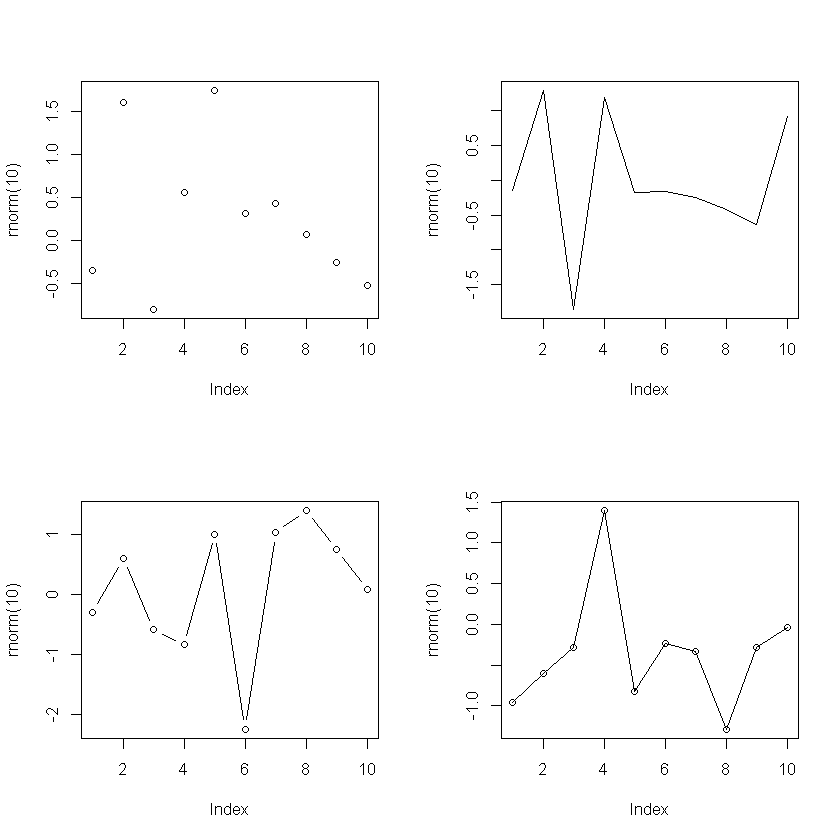

In [13]:
par(mfrow=c(2, 2)) # 2 × 2 array to be filled by rows

plot(rnorm(10), type = "p")
plot(rnorm(10), type = "l")
plot(rnorm(10), type = "b")
plot(rnorm(10), type = "o")

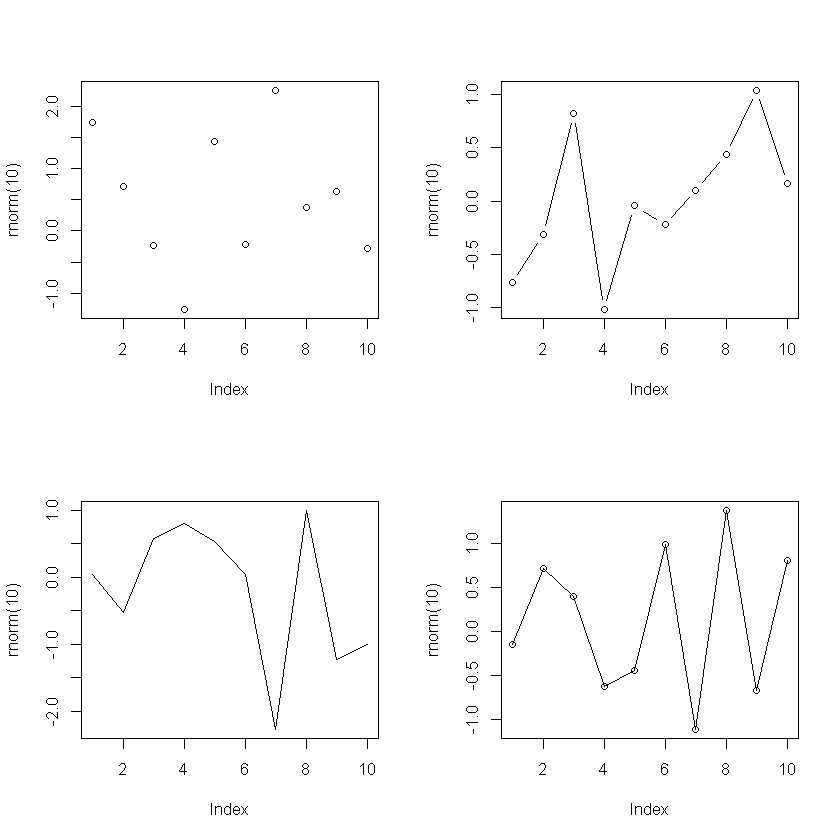

In [14]:
par(mfcol = c(2, 2))  # A 2 × 2 array to be filled by columns 
plot(rnorm(10), type = "p")
plot(rnorm(10), type = "l")
plot(rnorm(10), type = "b")
plot(rnorm(10), type = "o")

<span style="color:red; font-family:Comic Sans MS">References</span>

http://research.stowers.org/mcm/efg/R/Graphics/Basics/mar-oma/index.htm  
https://www.stat.auckland.ac.nz/~ihaka/787/  
https://www.r-graph-gallery.com/74-margin-and-oma-cheatsheet/  
http://www.pitt.edu/~njc23/  
http://www.melissaclarkson.com/resources/R_guides/  

<span style="color:red; font-family:brandon">Further  Resources</span>
